<a href="https://colab.research.google.com/github/ariefwcks303/MachineLearningFromScratch/blob/main/Latihan_Studi_Kasus_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Loading

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
def read(path):
  data = pd.read_csv(path)

  return data

In [45]:
train = '/content/drive/MyDrive/3. Dicoding Platform/2. Microsoft Elevate Training Center/4. Belajar Machine Learning untuk Pemula/Dataset/flood/train.csv'
data_train = read(train)


In [46]:
data_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [47]:
test = '/content/drive/MyDrive/3. Dicoding Platform/2. Microsoft Elevate Training Center/4. Belajar Machine Learning untuk Pemula/Dataset/flood/test.csv'
data_test = read(test)

In [48]:
data_test

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


##Data Cleaning dan Transformation

In [49]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [50]:
# Menampilkan statistik deskriptif dari dataset
data_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531782,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [51]:
#Check Missing Value
missing_value = data_train.isnull().sum()
missing_value[missing_value>0]

,0


tidak ada missing value

memeriksa adanya outlier

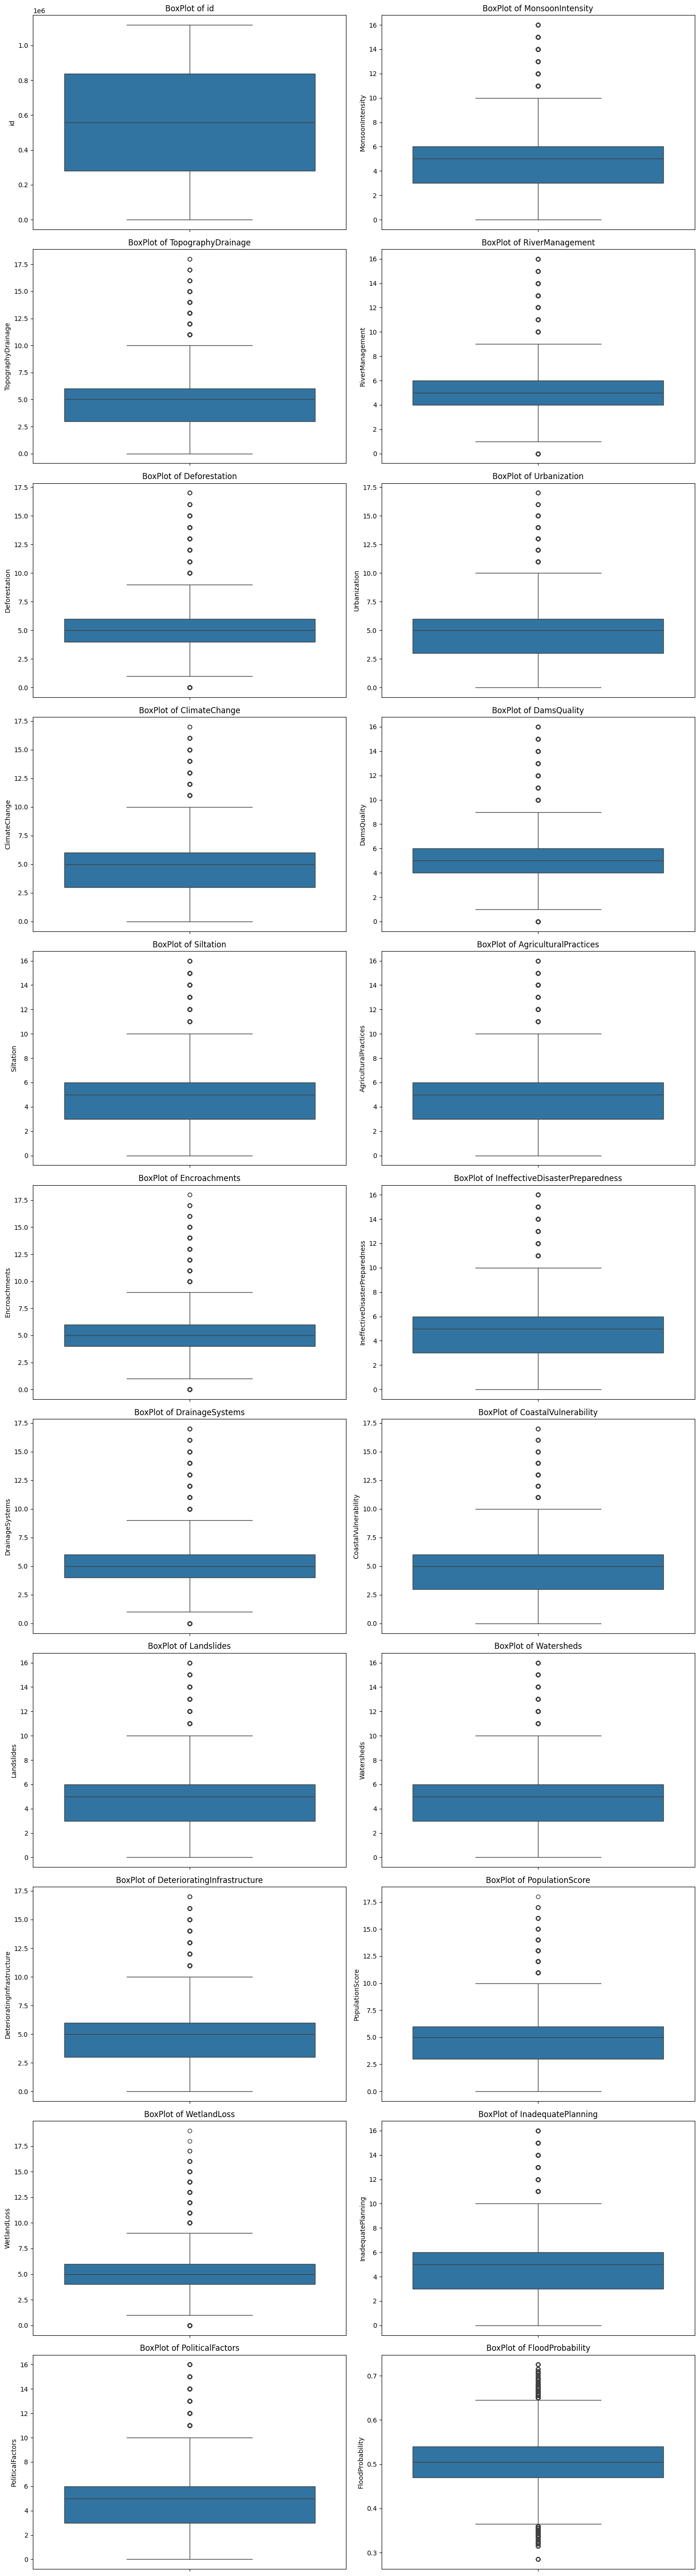

In [52]:
import math

num_features = len(data_train.columns)
num_cols = 2 # We want two columns for left & right separation
num_rows = math.ceil(num_features / num_cols) # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten() # Flatten the axes array for easier iteration

for i, feature in enumerate(data_train.columns):
  sns.boxplot(y=data_train[feature], ax=axes[i]) # Plot boxplot on the current subplot
  axes[i].set_title(f'BoxPlot of {feature}')
  axes[i].set_xlabel('') # Remove x-label for vertical boxplots

# Hide any unused subplots if the number of features is odd
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

Lakukan penghapusan data yang berada dibawah dan diatas menggunakan rumus InterQuartile Range (IQR)




In [53]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
q1 = data_train.quantile(0.25)
q3 = data_train.quantile(0.75)
iqr = q3 - q1


# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((data_train < (q1 - 1.5 * iqr)) | (data_train > (q3 + 1.5 * iqr))).any(axis=1)
df_condition = data_train.loc[condition, data_train.columns]

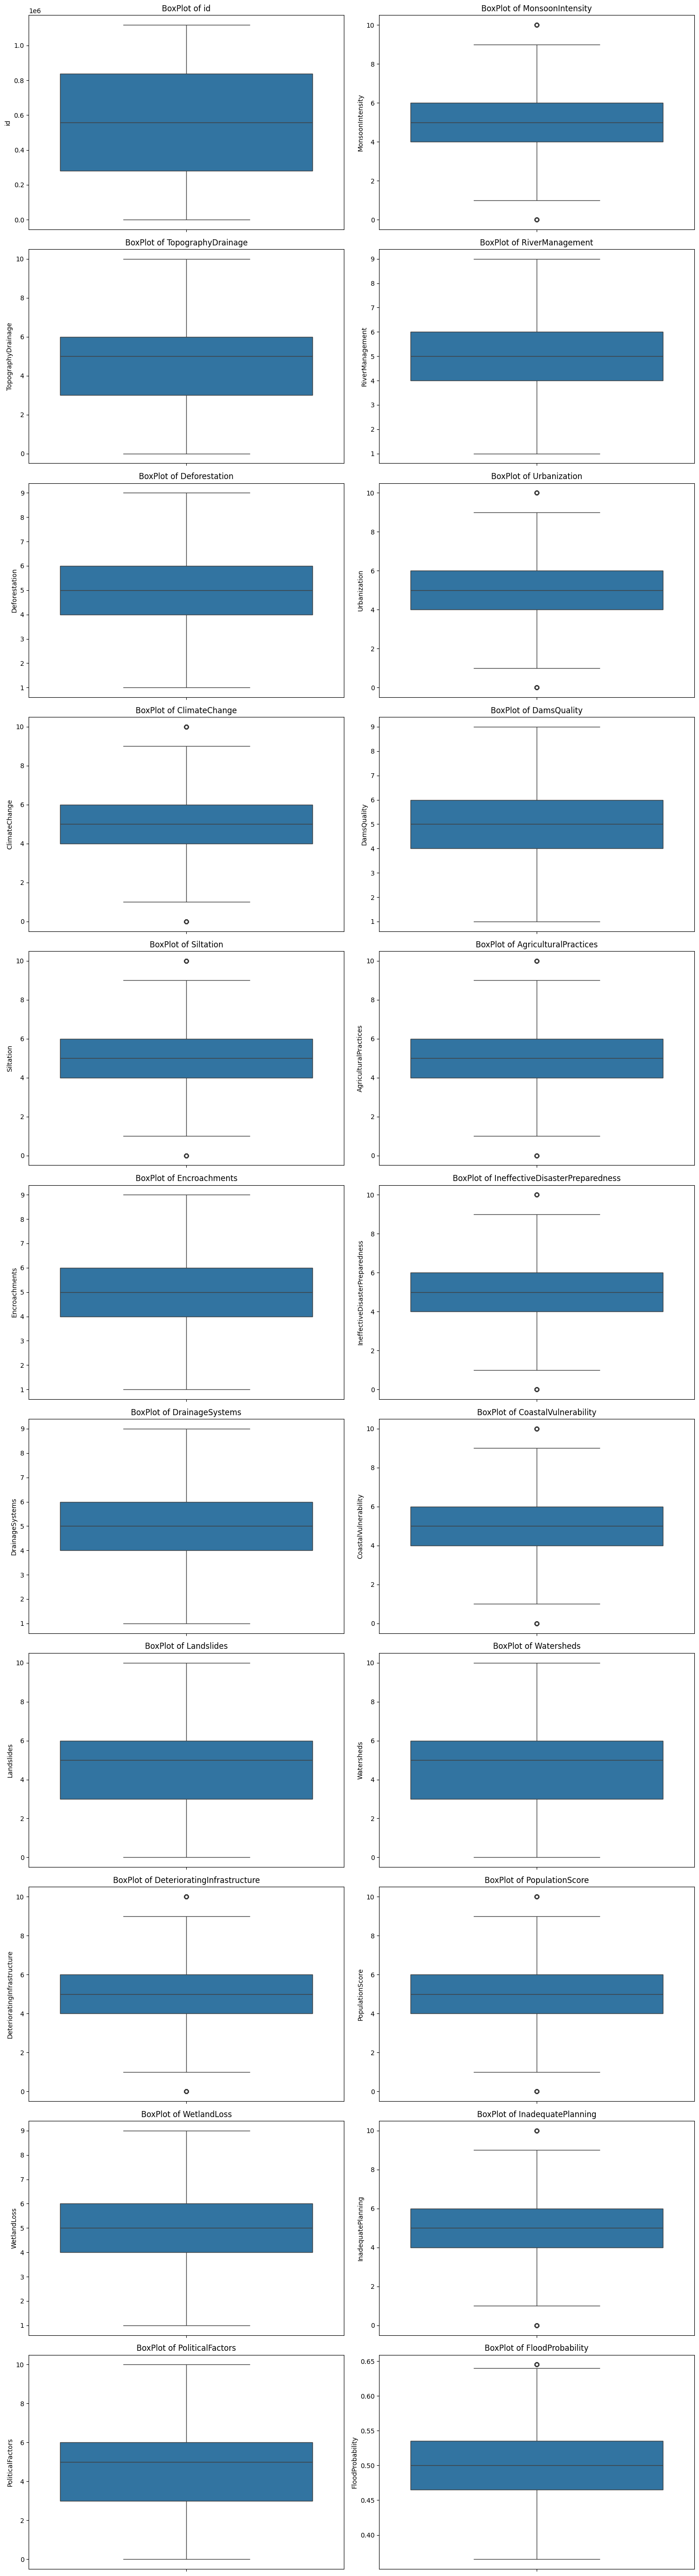

In [54]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten() # Flatten the axes array for easier iteration

for i, feature in enumerate(df_condition.columns):
  sns.boxplot(y=df_condition[feature], ax=axes[i]) # Plot boxplot on the current subplot
  axes[i].set_title(f'BoxPlot of {feature}')
  axes[i].set_xlabel('') # Remove x-label for vertical boxplots

# Hide any unused subplots if the number of features is odd
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

Hasil menggunakan IQR banyak Outlier yang dihilangkan

dikarnakan seluruh tipe data numerik, kita tidak melakukan transformasi dan perubahan data kategorikal.

langsung gunakan StandarScaler

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
##Gunakan data df_condition yang sudah dihilangkan outliernya

In [57]:
# Memastikan hanya data dengan tipe numerikal yang akan diproses
num_feature = df_condition.select_dtypes(include=['int64', 'float64']).columns

# Standardisasi fitur numerik
scaler = StandardScaler()
df_condition[num_feature] = scaler.fit_transform(df_condition[num_feature])

### Histograms Before and After Scaling

Let's visualize the distributions of some numerical features before and after `StandardScaler` to observe the effect of scaling. We'll pick a few representative columns for this comparison.

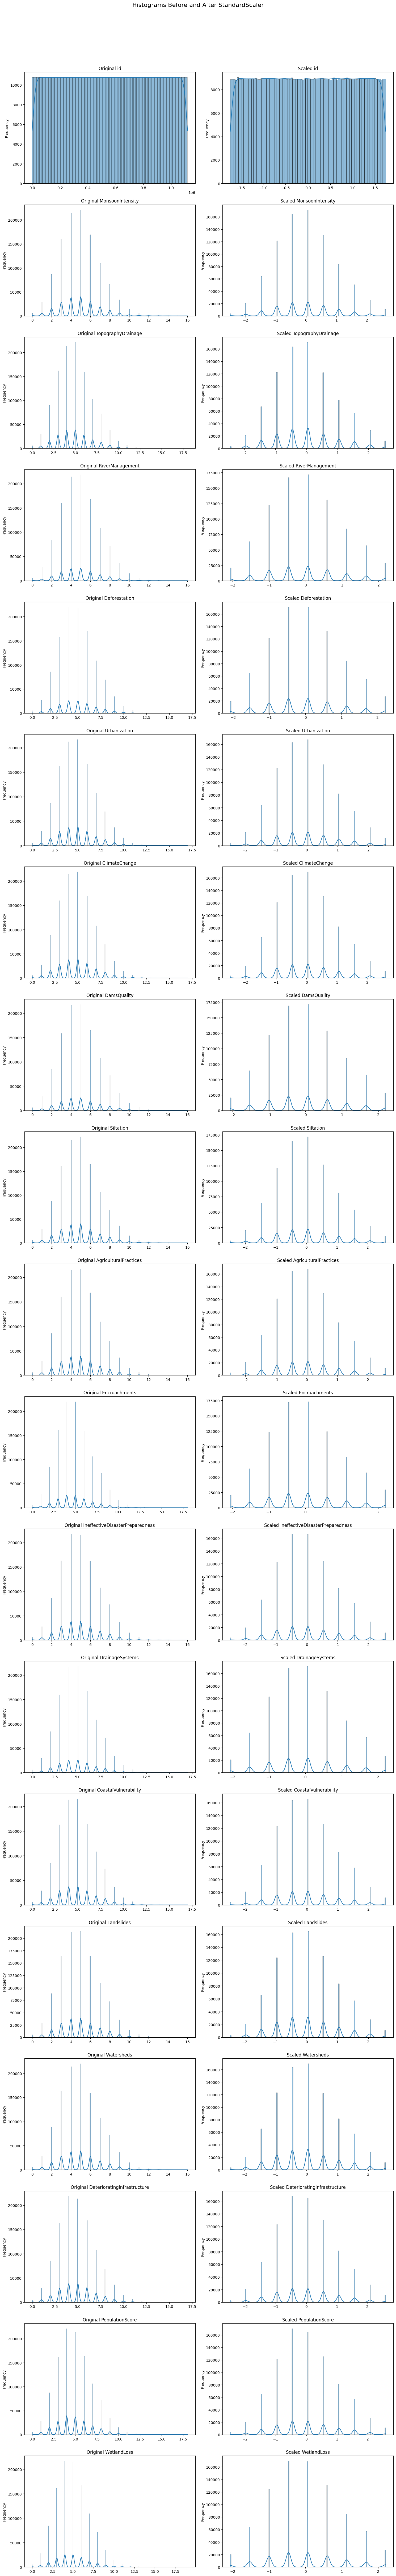

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical features (excluding 'id' and 'FloodProbability' if they are not to be scaled or are targets)
# Assuming 'id' is just an identifier and 'FloodProbability' is the target variable
# We'll use the same num_feature identified previously, which includes 'FloodProbability' and 'id' as it was applied to all numerical columns

# Let's select a few features to visualize for clarity, e.g., the first 6 numerical features
features_to_plot = num_feature[:19]

# Determine the number of rows needed for subplots (2 plots per feature: before and after)
num_rows_plots = len(features_to_plot)

fig, axes = plt.subplots(num_rows_plots, 2, figsize=(15, 5 * num_rows_plots))
fig.suptitle('Histograms Before and After StandardScaler', y=1.02, fontsize=16)

for i, feature in enumerate(features_to_plot):
    # Plot for original data_train
    sns.histplot(data_train[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Original {feature}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Frequency')

    # Plot for scaled df_condition
    sns.histplot(df_condition[feature], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Scaled {feature}')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Memeriksa data duplikat

In [59]:
# Mengidentifikasi baris duplikat
data_dup = df_condition.duplicated()

# Menghitung jumlah baris duplikat
jumlah_duplikat = data_dup.sum()

print(f'Jumlah baris duplikat: {jumlah_duplikat}')

Jumlah baris duplikat: 0


##Exploratory Data Analysis

In [60]:
df_condition.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,845886.0,3.128825e-16,1.000001,-1.732268,-0.866175,0.000020,0.866100,1.732027
MonsoonIntensity,845886.0,-1.722920e-16,1.000001,-2.503498,-0.454298,0.058002,0.570302,2.619502
TopographyDrainage,845886.0,-8.252983e-18,1.000001,-2.449018,-0.949263,0.050574,0.550492,2.550165
RiverManagement,845886.0,-1.122910e-16,1.000001,-2.065325,-0.468118,0.064284,0.596686,2.193893
Deforestation,845886.0,-1.138030e-16,1.000001,-2.080702,-0.467537,0.070185,0.607907,2.221073
Urbanization,845886.0,-1.484907e-17,1.000001,-2.472198,-0.461547,0.041116,0.543778,2.554429
ClimateChange,845886.0,1.193637e-16,1.000001,-2.500029,-0.463123,0.046103,0.555330,2.592235
DamsQuality,845886.0,1.572309e-16,1.000001,-2.062896,-0.465651,0.066764,0.599178,2.196423
Siltation,845886.0,-1.516197e-17,1.000001,-2.487267,-0.456406,0.051310,0.559025,2.589886
AgriculturalPractices,845886.0,1.194309e-16,1.000001,-2.487272,-0.463606,0.042311,0.548227,2.571894


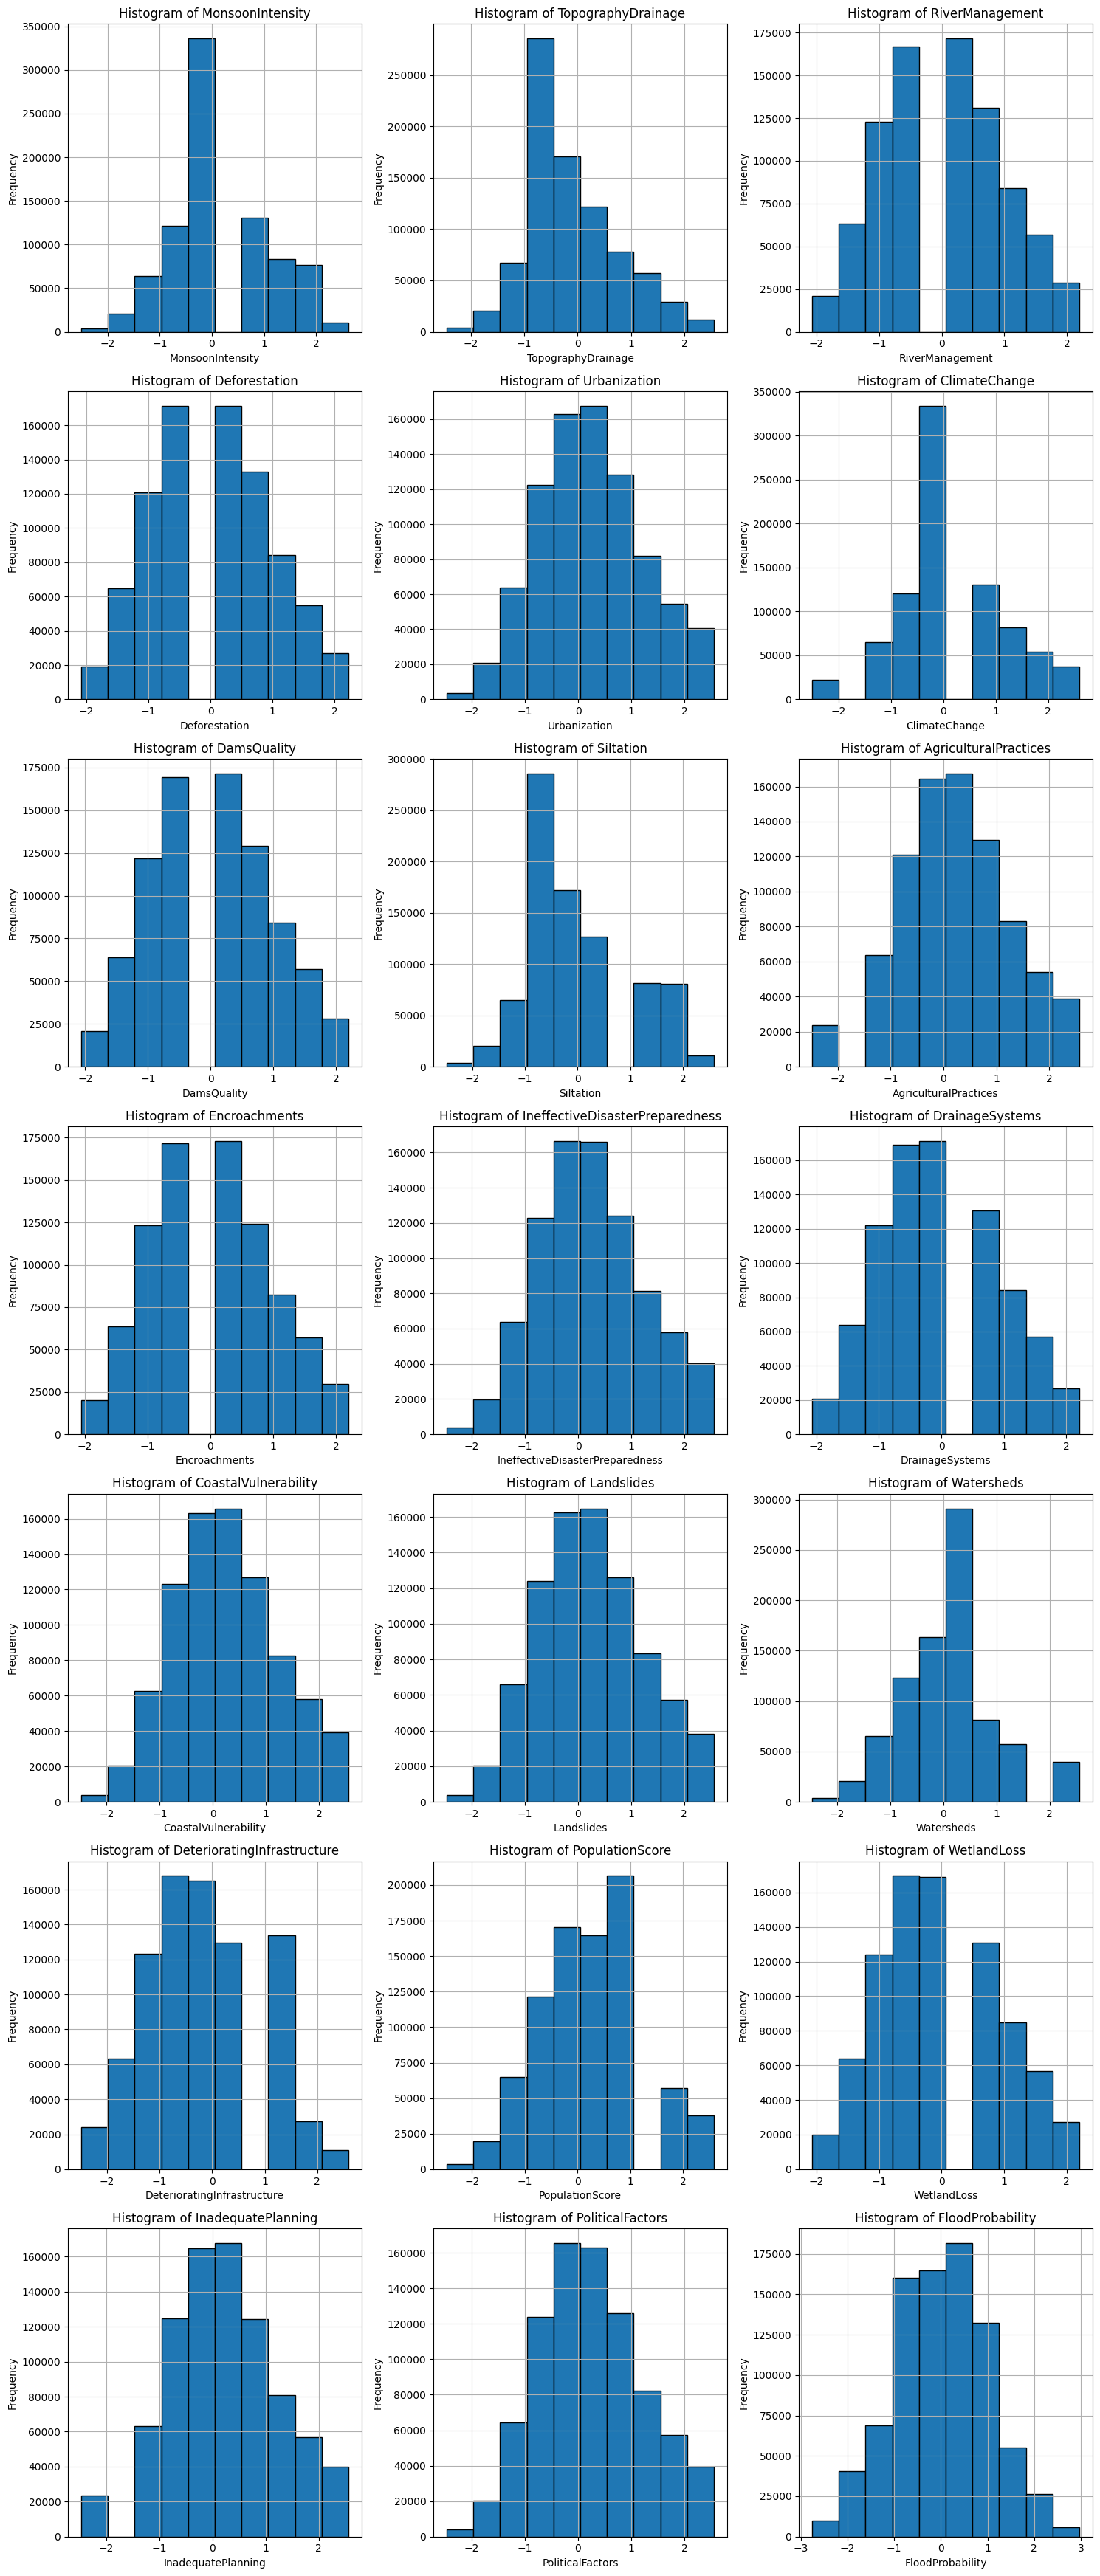

In [61]:
# Visualisaikan setiap data yang sudah discaler menggunakan histogram supaya mempermudah keterbacaan

import math

# Hapus Kolom ID
columns_to_plot = df_condition.drop(columns=["id"]).columns

# menampilkan jumlah plot dalam 1 baris
num_cols_hist = 3

# Calculate the number of rows needed
num_rows_hist = math.ceil(len(columns_to_plot) / num_cols_hist)

# Create a new figure and axes for these histograms
fig_hist, axes_hist = plt.subplots(num_rows_hist, num_cols_hist, figsize=(15, 5 * num_rows_hist))
axes_hist = axes_hist.flatten() # Flatten the axes array for easier iteration

for i, column in enumerate(columns_to_plot):
    df_condition[column].hist(ax=axes_hist[i], bins=10, edgecolor='black')
    axes_hist[i].set_title(f'Histogram of {column}')
    axes_hist[i].set_xlabel(column)
    axes_hist[i].set_ylabel('Frequency')

# Hide any unused subplots if the number of features is odd
for j in range(i + 1, len(axes_hist)):
    fig_hist.delaxes(axes_hist[j])

plt.tight_layout()
plt.show()

dengan stadarisasi mengurangi efek bias pada data kita, dilihat dari hasil setiap histogram data diatas

##Featue Selection

In [62]:
#hapus kolom 'id'
#df_condition = df_condition.drop(columns=['id'])

In [67]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_correlation = df_condition.corrwith(df_condition['FloodProbability'])

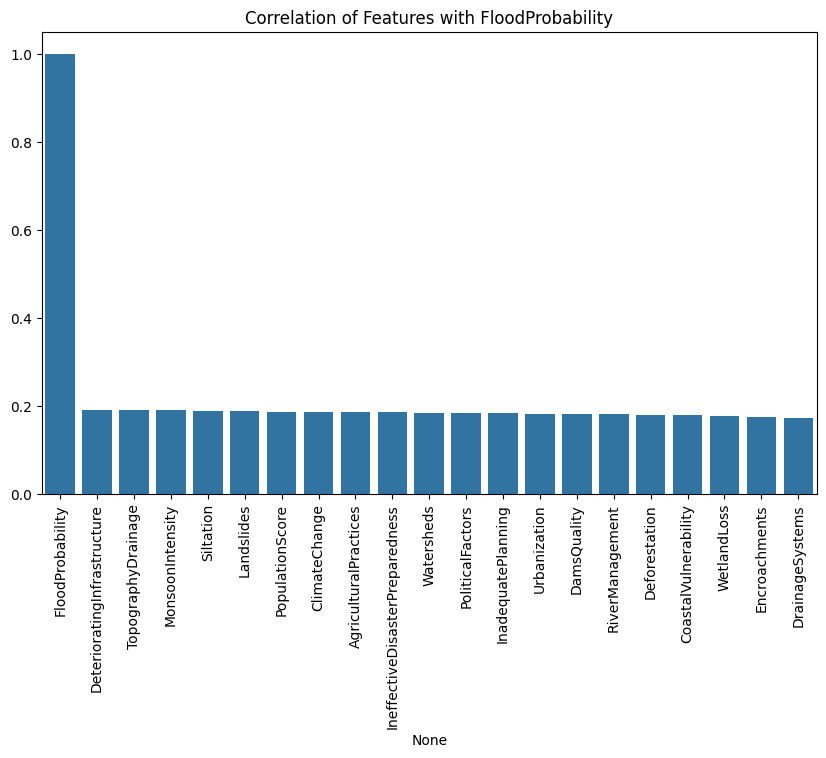

In [68]:
target_correlation_sorted = target_correlation.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation_sorted.index, y=target_correlation_sorted.values)
plt.title('Correlation of Features with FloodProbability')
plt.xticks(rotation=90)
plt.show()

Lanjutkan dengan data splitting

##Data Splittting


In [69]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Split X & y
X = df_condition.drop(columns=['FloodProbability'])
y = df_condition['FloodProbability']

#Split data_train & data_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Jumlah data: {len(X)}')
print(f'Jumlah X_train : {len(X_train)}')
print(f'Jumlah y_train : {len(X_test)}')

Jumlah data: 845886
Jumlah X_train : 676708
Jumlah y_train : 169178


##Modelling

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

###LARS

In [71]:
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(X_train, y_train)

pred_lars = lars.predict(X_test)

In [72]:
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

print(f'MAE: {mae_lars}')
print(f'MSE: {mse_lars}')
print(f'R2: {r2_lars}')


data = {'MAE': [mae_lars], 'MSE': [mse_lars], 'R2': [r2_lars]}

df_result = pd.DataFrame(data, index=['Lars'])
df_result

MAE: 0.8064108660421873
MSE: 1.0011650665986356
R2: 9.307124908519704e-05


,MAE,MSE,R2
Lars,0.806411,1.001165,0.000093


###Linear Regression

In [74]:
Linear_Reg = LinearRegression()
Linear_Reg.fit(X_train, y_train)

pred_lr = Linear_Reg.predict(X_test)


mae_lr = mean_absolute_error(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)


print(f'MAE: {mae_lr}')
print(f'MSE: {mse_lr}')
print(f'R2: {r2_lr}')

df_result.loc['Linear Regression'] = [mae_lr, mse_lr, r2_lr]
df_result

MAE: 0.3296535098498036
MSE: 0.17176805039883938
R2: 0.828447805999317


,MAE,MSE,R2
Lars,0.806411,1.001165,0.000093
Linear Regression,0.329654,0.171768,0.828448


###Gradient Boosting Regressor

In [75]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)

pred_gbr = GBR.predict(X_test)

mae_gbr = mean_absolute_error(y_test, pred_gbr)
mse_gbr = mean_squared_error(y_test, pred_gbr)
r2_gbr = r2_score(y_test, pred_gbr)


print(f'MAE: {mae_gbr}')
print(f'MSE: {mse_gbr}')
print(f'R2: {r2_gbr}')

df_result.loc['Gradient Boosting Regressor'] = [mae_gbr, mse_gbr, r2_gbr]
df_result

MAE: 0.5129594793421594
MSE: 0.38081867158547644
R2: 0.6196598932384723


,MAE,MSE,R2
Lars,0.806411,1.001165,0.000093
Linear Regression,0.329654,0.171768,0.828448
Gradient Boosting Regressor,0.512959,0.380819,0.619660


**Interpretasi Metrik Evaluasi**

Tabel menunjukkan kinerja tiga model regresi (Lars, Linear Regression, dan Gradient Boosting Regressor) berdasarkan tiga metrik utama: MAE, MSE, dan R2.


Pentingnya Setiap Metrik
1. MAE (Mean Absolute Error):
  * Mengukur rata-rata besarnya kesalahan antara prediksi dan nilai aktual.
  * Nilai yang lebih kecil lebih baik.

2. MSE (Mean Squared Error):

  * Mengukur rata-rata kuadrat kesalahan. Memberikan penalti yang lebih besar   untuk kesalahan yang besar (outlier).
  * Nilai yang lebih kecil lebih baik.

3. R2 (R-squared) / Koefisien Determinasi:

  * Mengukur proporsi varians dalam variabel dependen yang dapat diprediksi dari variabel independen.
  * Nilai berkisar antara 0 hingga 1. Nilai yang lebih mendekati 1 lebih baik, karena menunjukkan model menjelaskan lebih banyak variabilitas data. Nilai yang mendekati 0 atau negatif berarti model sangat buruk (seperti model Lars).

✅ Pemilihan Model Terbaik
Berdasarkan metrik:

  * Linear Regression memiliki nilai MAE dan MSE terendah (0.329654 dan 0.171768).

  * Linear Regression juga memiliki nilai R2 tertinggi (0.828448).



Kesimpulan
Model Linear Regression menunjukkan kinerja terbaik di antara ketiga model tersebut.

Dengan R2 sebesar 0.828448, model ini menjelaskan sekitar 82.84% variabilitas dalam data target, yang merupakan angka yang baik.

Nilai MAE dan MSE yang rendah mengonfirmasi bahwa rata-rata kesalahan prediksi model ini jauh lebih kecil dibandingkan dua model lainnya.

Model Lars memiliki kinerja yang sangat buruk, ditunjukkan dengan nilai R2 yang mendekati nol (0.000093), menunjukkan bahwa model ini hampir tidak lebih baik daripada hanya memprediksi rata-rata data.